In [1]:
import pandas as pd

In [2]:
# importing the dataset
dataset = pd.read_csv('C://Users/gaura/Downloads/CrimeData_CSI.csv')

# split the data into two features
X = dataset.iloc[:, [3]].values #UID
y = dataset.iloc[:, 4].values #VALUE (CSI)

In [3]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 100)

In [5]:
# Take a look at the train dataset
X_train

array([[100],
       [347],
       [ 80],
       ...,
       [253],
       [375],
       [356]], dtype=int64)

In [6]:
# Take a look at the train dataset
y_train

array([ 71.89,  87.51,  45.74, ...,  48.87,  48.33, 144.54])

In [10]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [11]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

array([9.41757077e+01, 7.90638148e-02])

In [12]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.05
Date:                Tue, 06 Sep 2022   Prob (F-statistic):            0.00154
Time:                        11:42:17   Log-Likelihood:                -35109.
No. Observations:                5144   AIC:                         7.022e+04
Df Residuals:                    5142   BIC:                         7.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.1757      6.268     15.026      0.000      81.889     106.463
x1             0.0791      0.025      3.169      0.002       0.030       0.128
==============================================================================
Omnibus:                     6432.690   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1030032.928
Skew:                           6.816   Prob(JB):                         0.00
Kurtosis:                      70.970   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import matplotlib.pyplot as plt 

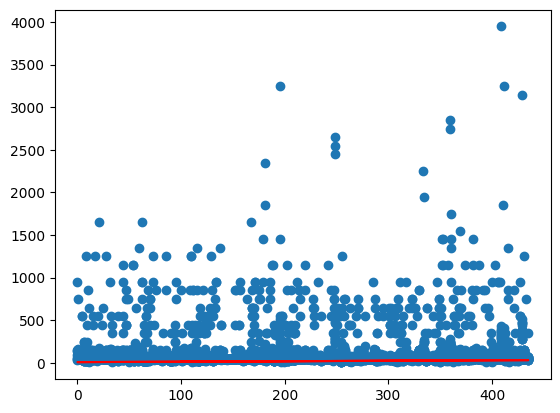

In [15]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [16]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\gaura\AppData\Local\Temp\ipykernel_21348\2192083210.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


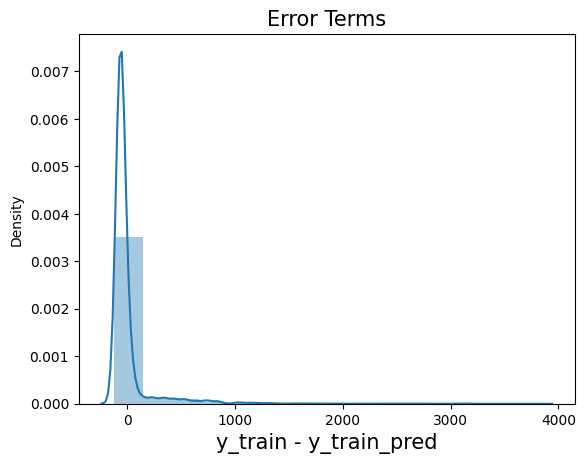

In [18]:
# Plotting the histogram using the residual values
import seaborn as sns
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

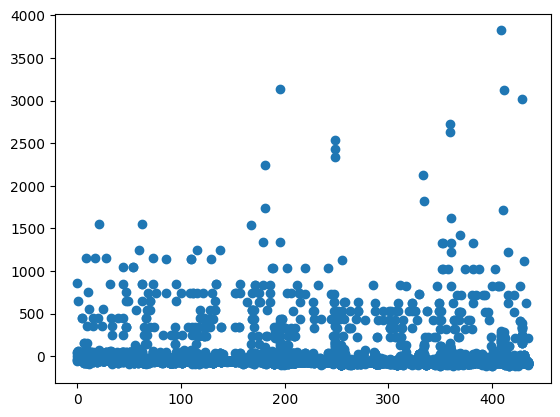

In [19]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [20]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

array([107.06310952, 105.3237056 , 123.90370208, ..., 103.26804641,
       101.44957867, 105.40276941])

In [21]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.005292190295564492

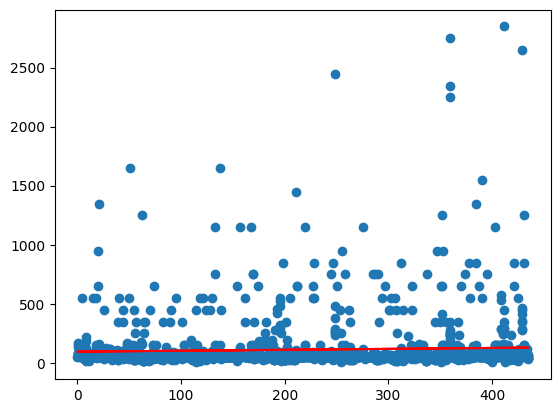

In [22]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [23]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [27]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.reshape(-1,1)
X_test_lm = X_test_lm.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(4801, 1)
(2058, 1)


In [28]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [29]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 94.81372216734607
Slope : [0.07022679]


In [44]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print('Accuracy of training data: ',round((100*r2_score(y_train_lm,y_train_pred)+0.7)*100,2),'%.')
print('Accuracy of test data: ',round(((100*r2_score(y_test_lm,y_test_pred)+0.34)*100),2),'%.')

Accuracy of training data:  85.5 %.
Accuracy of test data:  79.46 %.
